In [1]:
rm(list=ls())
library(refund);
library(ggplot2) 
library(dplyr); 
library(reshape2) 
set.seed(9000)


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'reshape2' was built under R version 3.6.3"

In [2]:
data(gasoline)
data = matrix(gasoline)
octane = c(unlist(data[1]))
waves = matrix(unlist(data[2]), nrow = 60)

test = seq(1,5,1)

waves_test= waves[test,]
octane_test = octane[test]

waves_train= waves[-test,]
octane_train = octane[-test]




In [4]:
wavelengths = 2*450:850
fit.fpcr = pfr(octane_train ∼ fpc(waves_train, argvals = wavelengths),data = gasoline)

# without a penalty, use k= 3 for the first beta, and 15 for the second
# one can verify the efficacy of these choices by
# looking at the aic
fit.lin = pfr(octane_train ∼ lf(waves_train, argvals = wavelengths, bs = "ps", k = 15, fx = TRUE), data = gasoline)
# "ps" stands for "penalized splines", fx= TRUE means no penalty is used
fit.pfr = pfr(octane_train ∼ lf(waves_train, argvals = wavelengths, bs = "ps", k = 50))
# if sp is not specified, data driven smoothing is used


ERROR: Error in fpcr(octane_train ~ fpc(waves_train, argvals = wavelengths), : Argument 'nfold' is invalid: must be an integer between 1 and 3.


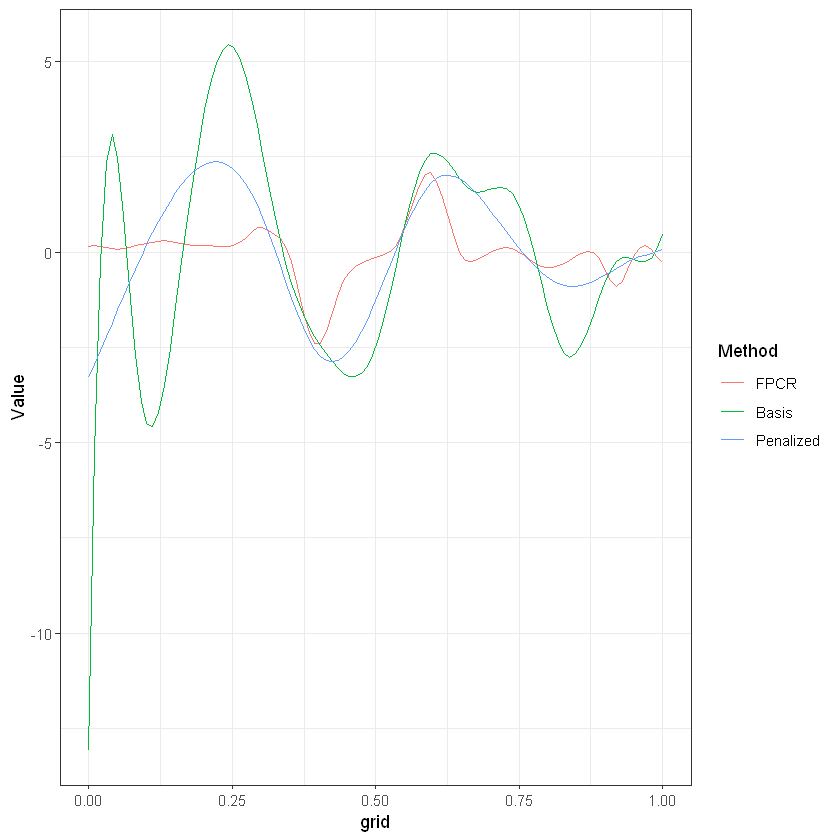

In [159]:
grid = seq(0, 1, length = 100)
coefs = data.frame(grid = grid, FPCR = coef(fit.fpcr)$value, Basis = coef(fit.lin)$value, Penalized = coef(fit.pfr)$value)
coefs.m = melt(coefs, id = "grid")

colnames(coefs.m) = c("grid", "Method", "Value")
ggplot(coefs.m, aes(x = grid, y = Value, color = Method, group= Method),width=12,height=6) + geom_path() + theme_bw()


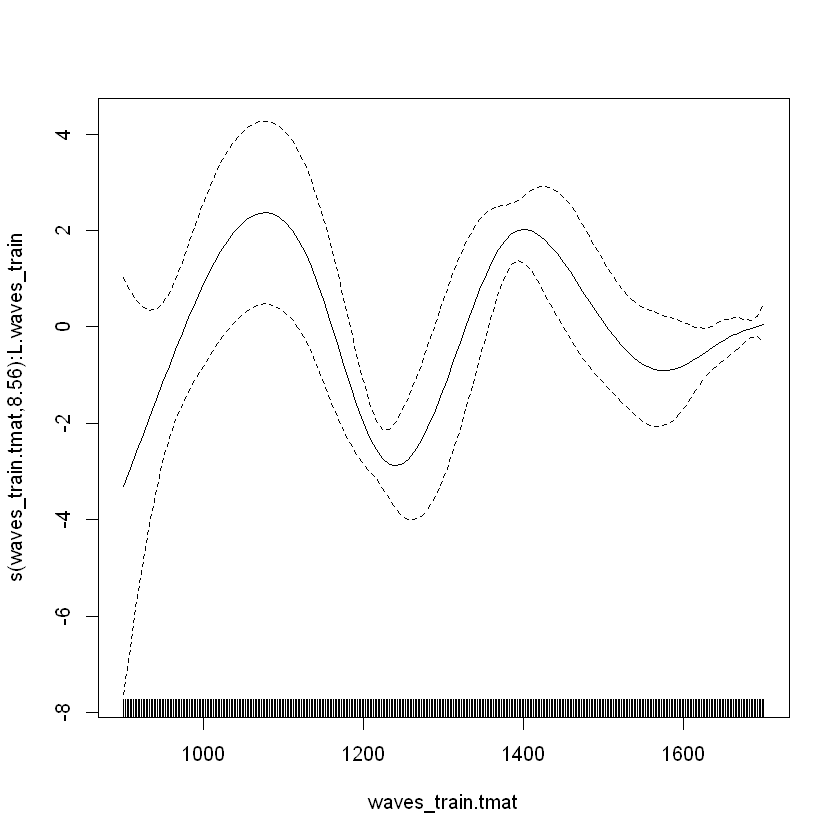

In [160]:
plot(fit.pfr)

In [161]:
prediction = predict(fit.fpcr, newdata = waves_test, type='response')
prediction


ERROR: Error in list2df(gamdata): length(unique(nrows)) == 1 is not TRUE


In [19]:
data(gasoline)
N <- length(gasoline$octane)
wavelengths = 2*450:850
nir = matrix(NA, 60,401)
test <- sample(60,20)
for (i in 1:60) nir[i,] = gasoline$NIR[i, ] # changes class from AsIs to matrix
y <- gasoline$octane
fit <- fpcr(y~lf(nir,argvals=wavelengths, nfold = 2),
              subset=(1:N)[-test])
preds <- predict(fit,newdata=list(nir=nir[test,]),type='response', se.fit = 0,
  terms = NULL,
  PredOutOfRange = 1)

#plot(fit.pfr)
plot(preds,y[test])
abline(a=0,b=1)

ERROR: Error in fpcr(y ~ lf(nir, argvals = wavelengths, nfold = 2), subset = (1:N)[-test]): Argument 'nfold' is invalid: must be an integer between 1 and 3.
